### Modelling An Antenna Array:  Using Python programming language- Numpy and Matplotlib
<b> Directing radio waves in a particular direction by adjusting their number, geometrical arrangement, and relative amplitudes and phases.

<b> Author: Jay Gautam, Darmstadt Germany

#### Two-antenna case (formulae and theory below)

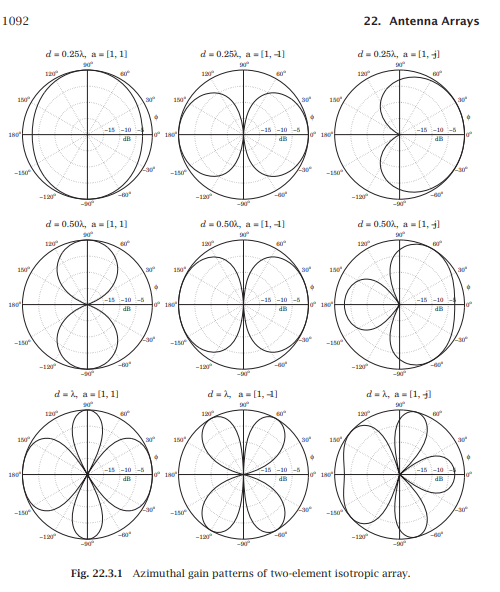

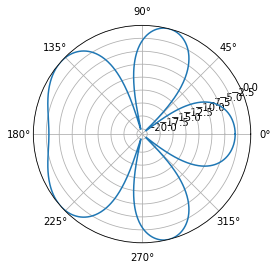

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Calculation of : Array factor and gain.
def gain(d, w):
    phi = np.linspace(0, 2*np.pi, 1000)
    psi = 2*np.pi * d / lam * np.cos(phi) # psi = (2*pi*d/lamda)*cos(phi)
    A = w[0] + w[1]*np.exp(1j*psi) # Array factor for two antenna case.
    g = np.abs(A)**2 # relative radiation power pattern ("gain") is the square of Array factor.
    return phi, g

# Calculation of the dirrective gain (dbi scale) of the antenna array.
def get_directive_gain(g, minDdBi=-20):
    DdBi = 10 * np.log10(g / np.max(g)) # directive gain = 10*log_10(g/g_max)
    return np.clip(DdBi, minDdBi, None) # It clips the directive gain below the certain values (minDdBi=-20).

# Wavelength(lam), antenna spacing(d), feed coefficients(w). => It determines the shape of the radiation pattern
lam = 1
d = lam
w = np.array([1, -1j]) # w[0] = 1, w[1] = -1j

# gain and directive gain.
phi, g = gain(d, w)
DdBi = get_directive_gain(g)

# Polar plot.
plt.polar(phi, DdBi)
# ax = plt.gca()
# ax.set_rticks([-20, -15, -10, -5])
# ax.set_rlabel_position(45)
plt.show()

#### Three-antenna array case (formulae and theory below)

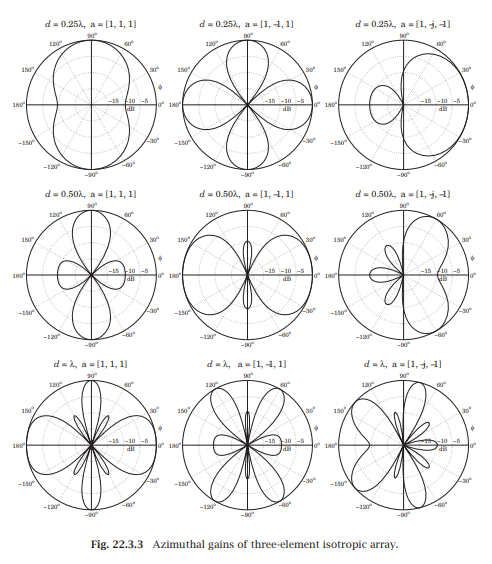

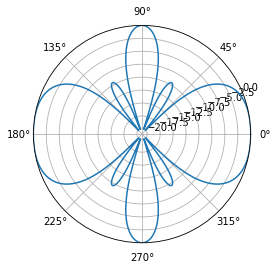

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Calculation of : Array factor and gain- in case of 3 array elements.
def gain(d, w):
    """Return the power as a function of azimuthal angle, phi."""
    phi = np.linspace(0, 2*np.pi, 1000)
    psi = 2*np.pi * d / lam * np.cos(phi)
    j = np.arange(len(w))
    A = np.sum(w[j] * np.exp(j * 1j * psi[:, None]), axis=1)
    g = np.abs(A)**2
    return phi, g

# Calculation of the dirrective gain (dbi scale) of the 3 antenna array.
def get_directive_gain(g, minDdBi=-20):
    """Return the "directive gain" of the antenna array producing gain g."""
    DdBi = 10 * np.log10(g / np.max(g))
    return np.clip(DdBi, minDdBi, None)

# Wavelength(lam), antenna spacing(d), feed coefficients(w) => It determines the shape of the radiation pattern
lam = 1
#d = lam / 2
d = lam
#w = np.array([1, -1, 1])
w = np.array([1, 1, 1])
#w = np.array([1, 1, 1, 1j])

# gain and directive gain.
phi, g = gain(d, w)
DdBi = get_directive_gain(g)

# Polar plot.
fig = plt.figure()
ax = fig.add_subplot(projection='polar')
ax.plot(phi, DdBi)
# ax.set_rticks([-20, -15, -10, -5])
# ax.set_rlabel_position(45)
plt.show()

#### Theory and formulae

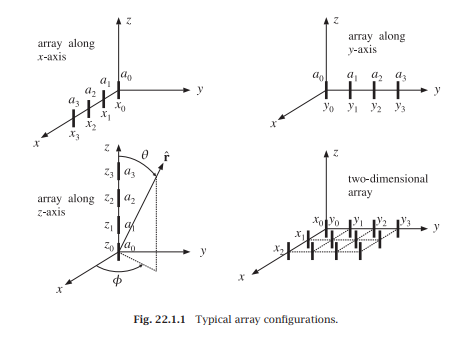
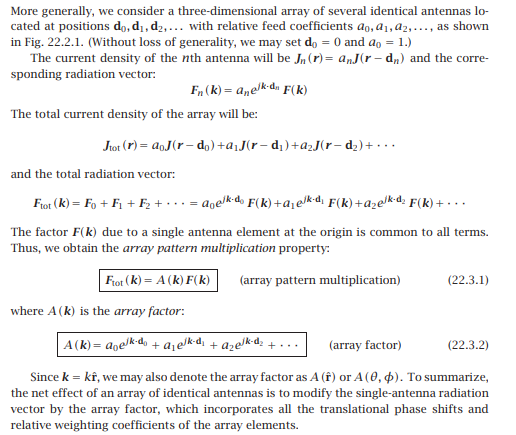